In [1]:
#pip install pydicom
#pip uninstall -y enum34
#pip install labelme==3.16.7
import cv2
import json
import labelme
import os
import PIL
import shutil
import sys
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from labelme import utils
from pydicom import dcmread
from PIL import Image

In [2]:
json_file_name = 'sarcopenia_data/SARCOPANIA0010_1.json'
print(json_file_name)
label_name_to_value = {}
json_data = json.load(open(json_file_name))

for shape in json_data["shapes"]:
    label_name = shape["label"]
    #label_name_to_value[label_name] = int(int(label_name.split('.')[0])*255/11)
    label_name_to_value[label_name] = int(int(label_name.split('.')[0]))
    
print(label_name_to_value)

sarcopenia_data/SARCOPANIA0010_1.json
{'5. Rt eretor spinae muscle': 5, '8. Lt trans abd,int and ext obl': 8, '9. Rt rectus abdominus muscle': 9, '2. Lt psoas major mucle': 2, '1. Rt psoas major mucle': 1, '3. Rt quardratus lumborum muscle': 3, '4. Lt quardratus lumborum muscle': 4, '6. Lt eretor spinae muscle': 6, '7. Rt trans abd,int and ext obl': 7, '10. Lt rectus abdominus muscle': 10, '11.L3 Vertebral body': 11}


In [ ]:
file_list = glob('sarcopenia_data/*.dcm')
folder_list = ['train', 'valid', 'test']
ratio = [8, 1, 1]

for folder in folder_list:
    folder_path = os.path.join('sarcopenia_data', folder)
    if os.path.exists(folder_path):
        if os.path.isdir(folder_path):
            shutil.rmtree(folder_path)
    os.mkdir(folder_path)
    print(f'create folder {folder_path}')


In [148]:
for i, dcm_file_name in enumerate(glob('sarcopenia_data/*.dcm')):
    ds = dcmread(dcm_file_name)
    img = ds.pixel_array
    json_file_name = dcm_file_name.split('.')[0] + '_1.json'
    json_data = json.load(open(json_file_name))
    
    #img = utils.img_b64_to_array(json_data['imageData'])
    label = utils.shapes_to_label(img.shape, json_data['shapes'], label_name_to_value)
    #print(label)
    #captions = ['%d: %s' % (l, name) for l, name in enumerate(lbl_names)]
    gt_img = utils.draw_label(label, ds.pixel_array)

    folder = 'train'
    if i > len(file_list)*sum(ratio[:2])/sum(ratio):
        folder = 'test'
    elif i > len(file_list)*sum(ratio[:1])/sum(ratio):
        folder = 'valid'
    folder = 'all'
    
    #img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.png')
    img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.dcm')
    print(img_file_name)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.imsave(img_file_name, img)
    shutil.copyfile(dcm_file_name, img_file_name)
    gt_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'_gt.png')
    #plt.imshow(gt_img, cmap=plt.cm.gray)
    #print(label)
    #plt.imsave(gt_file_name, label)
    cv2.imwrite(gt_file_name, label)
    
    #print(label)
    #plt.show()
    
    #break


sarcopenia_data/all/SARCOPANIA0020.dcm
sarcopenia_data/all/SARCOPANIA0060.dcm
sarcopenia_data/all/SARCOPANIA0040.dcm
sarcopenia_data/all/SARCOPANIA0090.dcm
sarcopenia_data/all/SARCOPANIA0100.dcm
sarcopenia_data/all/SARCOPANIA0110.dcm
sarcopenia_data/all/SARCOPANIA0050.dcm
sarcopenia_data/all/SARCOPANIA0130.dcm
sarcopenia_data/all/SARCOPANIA0140.dcm
sarcopenia_data/all/SARCOPANIA0080.dcm
sarcopenia_data/all/SARCOPANIA0120.dcm
sarcopenia_data/all/SARCOPANIA0150.dcm
sarcopenia_data/all/SARCOPANIA0170.dcm
sarcopenia_data/all/SARCOPANIA0200.dcm
sarcopenia_data/all/SARCOPANIA0030.dcm
sarcopenia_data/all/SARCOPANIA0190.dcm
sarcopenia_data/all/SARCOPANIA0070.dcm
sarcopenia_data/all/SARCOPANIA0210.dcm
sarcopenia_data/all/SARCOPANIA0250.dcm
sarcopenia_data/all/SARCOPANIA0230.dcm
sarcopenia_data/all/SARCOPANIA0260.dcm
sarcopenia_data/all/SARCOPANIA0280.dcm
sarcopenia_data/all/SARCOPANIA0330.dcm
sarcopenia_data/all/SARCOPANIA0240.dcm
sarcopenia_data/all/SARCOPANIA0300.dcm
sarcopenia_data/all/SARCO

In [9]:
ds = dcmread('sarcopenia_data/SARCOPANIA0010.dcm')
img = ds.pixel_array
print(img.shape)
plt.imsave('SARCOPANIA0010_1.png', img, cmap=plt.cm.gray)

(512, 512)


In [8]:
a='./../sarcopenia_data/train/SARCOPANIA0190.png'
a.split('.png')[0]

'./../sarcopenia_data/train/SARCOPANIA0190'

In [16]:
from PIL import Image
GT = Image.open('sarcopenia_data/train/SARCOPANIA0020_gt.png')
print(GT.size)
GT = np.array(GT)
print(GT.any())
index = np.nonzero(GT)
print(len(index[0]))
print(GT[index])

(512, 512)
True
29378
[9 9 9 ... 6 6 6]
(12,)


In [11]:
import torch
from Image_Segmentation.network import U_Net, AttU_Net
from Image_Segmentation.evaluation import get_DC

net = AttU_Net(img_ch=3, output_ch=12).to('cuda')
net.load_state_dict(torch.load('Image_Segmentation/models/AttU_Net-14-1.907.pkl'))
            
net.train(False)
#net.eval()

AttU_Net(
  (Maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv1): conv_block(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (Conv2): conv_block(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
  

window param 56, 250
Dice score 0.9746600812792866
torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([234887])


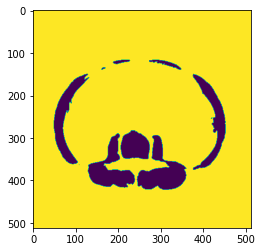

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([1571])


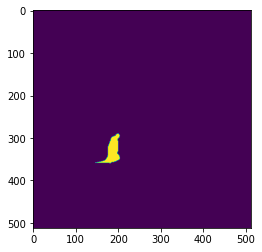

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([1442])


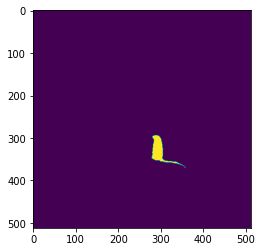

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([617])


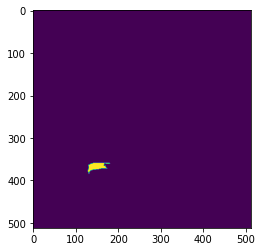

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([519])


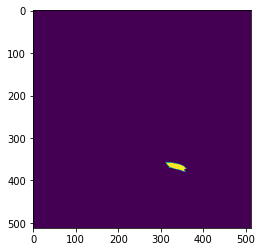

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([3706])


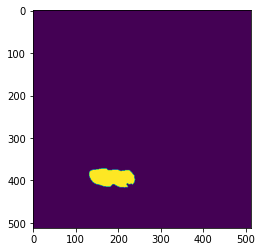

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([4811])


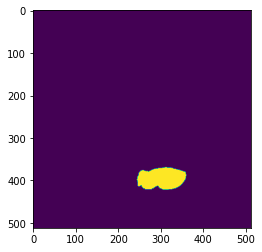

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([5421])


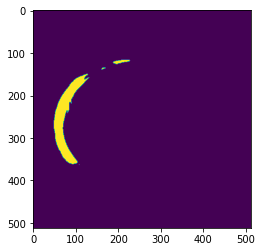

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([5142])


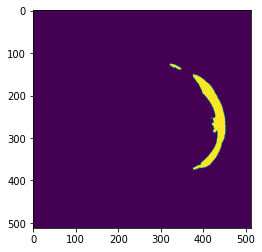

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([0])


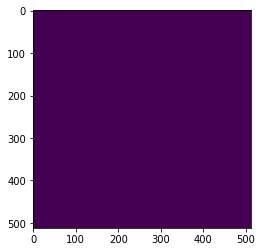

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([373])


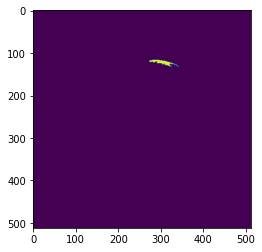

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([3655])


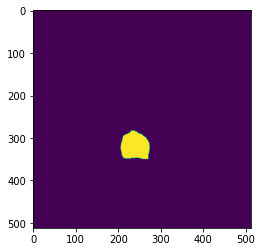

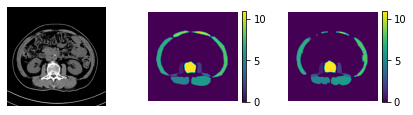

In [22]:
import torch.nn.functional as F
from glob import glob
from torchvision import transforms as T

n_classes = 12

for file in glob('sarcopenia_data/all/*.dcm'):
#for file in glob('sarcopenia_data/valid/*_gt.png'):
#for file in glob('sarcopenia_data/test/*_gt.png'):
    image_name = file.split('.')[0]
    
    image_path = image_name+'.dcm'
    gt_path = image_name+'_gt.png'

    ds = dcmread(image_path)
    image = ds.pixel_array
    h, w = image.shape
    image = image.astype('float64')
    intercept = ds.RescaleIntercept
    wc = 50
    ww = 250
    UL = wc + ww/2
    LL = wc - ww/2
    """
    try:
        wc = ds.WindowCenter[0]
        ww = ds.WindowWidth[0]
        UL = wc + ww/2
        LL = wc - ww/2
    except:
        wc = ds.WindowCenter
        ww = ds.WindowWidth
        UL = wc + ww/2
        LL = wc - ww/2
    """
    print(f'window param {wc}, {ww}')
    slope = ds.RescaleSlope
    image -= (-intercept+LL)
    image[image<0] = 0
    image[image>(UL-LL)] = UL-LL
    image *= 255.0/image.max()
    image = image.astype('uint8')
    image = Image.fromarray(image)
    image_src = image.convert('RGB')
    
    image_gt = Image.open(gt_path)

    Transform = []
    Transform.append(T.ToTensor())
    Transform = T.Compose(Transform)

    image = Transform(image_src)

    Norm_ = T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))   
    image = Norm_(image)

    image = image.unsqueeze(0).to('cuda')

    pred = F.sigmoid(net(image))
    pred = pred.squeeze(0).detach().cpu()
    GT = torch.tensor(np.array(image_gt), dtype=torch.int64)
    #print('before', np.unique(GT), GT.shape)
    GT = torch.nn.functional.one_hot(GT, n_classes).to(torch.float).permute(2,0,1)
    print(f'Dice score {get_DC(pred, GT)}')
    pred = np.argmax(pred, axis=0)
    
    for i in range(n_classes):
        print(pred.shape)
        print((pred==i).shape)
        mask = pred[pred==i]
        print(mask.shape)
        plt.imshow((pred==i))
        plt.show()
        
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.tight_layout()
    #print(image.shape)
    im1 = ax1.imshow(image_src)
    ax1.set_axis_off()

    im2 = ax2.imshow(image_gt)
    fig.colorbar(im2, ax=ax2, fraction=0.046)
    ax2.set_axis_off()

    im3 = ax3.imshow(pred)
    ax3.set_axis_off()
    fig.colorbar(im3, ax=ax3, fraction=0.046)
    plt.show()
    break

In [124]:
n = 5
indices = torch.randint(0,n, size=(4,7))
one_hot = torch.nn.functional.one_hot(indices, n) # size=(4,7,n)
print(indices)
print(one_hot.shape)
print(np.argmax(one_hot, axis=2))

tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])
torch.Size([4, 7, 5])
tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])
